# Problem Set 2
## Siyuan Peng

In [1]:
import sympy as sy
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

### Problem 1

In [2]:
x = sy.symbols('x')
f_x = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))
f_prime = sy.diff(f_x, x)
f_prime

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

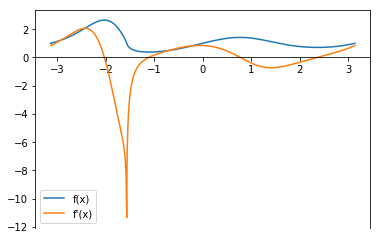

In [3]:
# plot f(x) and its derivative
x_space = np.linspace(-np.pi,np.pi,1000)
ax = plt.gca()
ax.spines['bottom'].set_position("zero")

f = sy.lambdify(x, f_x)
fx_prime = sy.lambdify(x, f_prime)

ax.plot(x_space,f(x_space),label='f(x)')
ax.plot(x_space,fx_prime(x_space),label='f\'(x)')
ax.legend()

### Problem 2

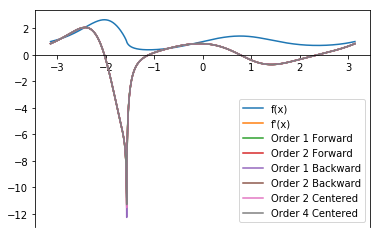

In [4]:
def Forward1(x, h = 0.001):
    return (f(x+h)-f(x))/h
def Forward2(x, h = 0.001):
    return (4*f(x+h)-3*f(x)-f(x+2*h))/(2*h)
def Backward1(x, h = 0.001):
    return (f(x)-f(x-h))/h
def Backward2(x, h = 0.001):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def Centered2(x, h = 0.001):
    return (f(x+h)-f(x-h))/(2*h)
def Centered4(x, h = 0.001):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

ax2 = plt.gca()
ax2.spines['bottom'].set_position("zero")

ax2.plot(x_space,f(x_space),label='f(x)')
ax2.plot(x_space,fx_prime(x_space),label='f\'(x)')
ax2.plot(x_space,Forward1(x_space),label='Order 1 Forward')
ax2.plot(x_space,Forward2(x_space),label='Order 2 Forward')
ax2.plot(x_space,Backward1(x_space),label='Order 1 Backward')
ax2.plot(x_space,Backward2(x_space),label='Order 2 Backward')
ax2.plot(x_space,Centered2(x_space),label='Order 2 Centered')
ax2.plot(x_space,Centered4(x_space),label='Order 4 Centered')
ax2.legend()

We could see from the above graph that seven results generated by different methods are almost the same. Seven curves overlap each other.

### Problem 3

In [5]:
def conver(x0):
    h = np.logspace(-8, 0, 9)
    b = fx_prime(x0)
    plt.figure(figsize=(8,5))
    plt.loglog(h, np.abs(Forward1(x0,h)-b),label='Order 1 Forward',marker='o')
    plt.loglog(h, np.abs(Forward2(x0,h)-b),label='Order 2 Forward',marker='o')
    plt.loglog(h, np.abs(Backward1(x0,h)-b),label='Order 1 Backward',marker='o')
    plt.loglog(h, np.abs(Backward2(x0,h)-b),label='Order 2 Backward',marker='o')
    plt.loglog(h, np.abs(Centered2(x0,h)-b),label='Order 2 Centered',marker='o')
    plt.loglog(h, np.abs(Centered4(x0,h)-b),label='Order 4 Centered',marker='o')
    plt.xlabel('h')
    plt.ylabel('Absolute Error')
    plt.legend(loc='upper left')
    plt.show()

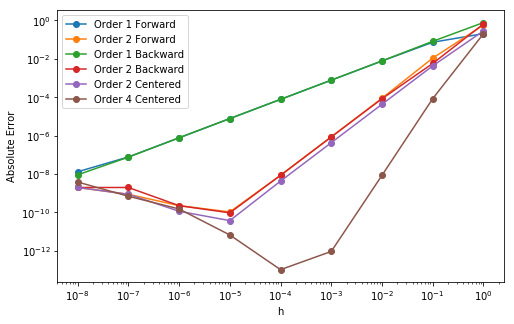

In [6]:
conver(1)

### Problem 4

In [13]:
# Load data
plane = np.load('plane.npy')
plane = pd.DataFrame(plane,columns = ['time', 'alpha', 'beta'])

# Convert degree to rad
plane['alpha'] = np.deg2rad(plane['alpha'])
plane['beta'] = np.deg2rad(plane['beta'])

# Calculate x(t) and y(t)
a=500
plane['x(t)'] = a * np.tan(plane['beta']) / (np.tan(plane['beta']) - np.tan(plane['alpha']))
plane['y(t)'] = a * np.tan(plane['beta']) * np.tan(plane['alpha']) / (np.tan(plane['beta']) - np.tan(plane['alpha']))

# Calculate x'(t) and y'(t) according to the problem
plane['x(t)_prime'] = 0.0
plane['y(t)_prime'] = 0.0

plane['x(t)_prime'][0] = plane['x(t)'][1] - plane['x(t)'][0]
plane['y(t)_prime'][0] = plane['y(t)'][1] - plane['y(t)'][0]

plane['x(t)_prime'][7] = plane['x(t)'][7] - plane['x(t)'][6]
plane['y(t)_prime'][7] = plane['y(t)'][7] - plane['y(t)'][6]

for i in range(1,7):
    plane['x(t)_prime'][i] = (plane['x(t)'][i + 1] - plane['x(t)'][i - 1]) / 2
    plane['y(t)_prime'][i] = (plane['y(t)'][i + 1] - plane['y(t)'][i - 1]) / 2

# Calulate the speed
plane['speed'] = np.sqrt(plane['x(t)_prime'] ** 2 + plane['y(t)_prime'] ** 2)

plane

,time,alpha,beta,x(t),y(t),x(t)_prime,y(t)_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44.665140,12.658266,46.424201
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45.323531,12.444889,47.001039
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47.280265,12.863104,48.998805
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48.360976,13.083197,50.099442
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46.650974,12.475760,48.290351
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49.700516,13.739086,51.564559
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51.898569,14.636669,53.923034
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49.554711,14.074988,51.514801


### Problem 5

In [8]:
from sympy import Symbol
def jacob(func, point, h):
    num_func = len(func)
    dim = len(point)
    J = np.zeros((num_func, dim))
    variables = set()
    for sub_func in func:
        variables = variables | sub_func.atoms(Symbol)
    for i, sub_func in enumerate(func):
        for j, val in enumerate(variables):
            do_sub_func = sy.simplify((sub_func.subs(val, val + h) - sub_func.subs(val, val - h)) / (2 * h))
            sub_func_prime = sy.lambdify(val, do_sub_func)
            J[i, j] = sub_func_prime(point[j])
    return J

In [9]:
x = sy.symbols('x')
y = sy.symbols('y')
func_1 = x ** 2
func_2 = x ** 3 - y
jacob([func_1, func_2], [1,1], 0.0001)

array([[ 0.        ,  2.        ],
       [-1.        ,  3.00000001]])

### Problem 7

In [10]:
import time
from autograd import numpy as anp
from autograd import grad

In [11]:
def time_error(N):
    timer_1 = np.zeros(N,dtype='float')
    timer_2 = np.zeros(N,dtype='float')
    timer_3 = np.zeros(N,dtype='float')
    
    error_1 = 1e-18 * np.ones(N,dtype='float')
    error_2 = np.zeros(N,dtype='float')
    error_3 = np.zeros(N,dtype='float')
    
    x = sy.symbols('x')
    f_x = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))
    
    g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
    dg = grad(g)
    
    for i in range(N):
        chosen_x = np.random.uniform(-np.pi, np.pi)
        timer_1_1 = time.clock()
        f_prime = sy.diff(f_x, x)
        fx_prime = sy.lambdify(x, f_prime)
        result_1 = fx_prime(chosen_x)
        timer_1_2 = time.clock()
        timer_1[i] = timer_1_2 - timer_1_1
        
        timer_2_1 = time.clock()
        result_2 = Centered4(chosen_x)
        timer_2_2 = time.clock()
        timer_2[i] = timer_2_2 - timer_2_1
        error_2[i] = abs(result_2 - result_1)
        
        timer_3_1 = time.clock()
        result_3 = dg(chosen_x)
        timer_3_2 = time.clock()
        timer_3[i] = timer_3_2 - timer_3_1
        error_3[i] = abs(result_3 - result_1)

    plt.figure(figsize=(8,5))
    plt.loglog(timer_1,error_1,'bo',label="SymPy")
    plt.loglog(timer_2,error_2,'yo',label="Difference Quotients")
    plt.loglog(timer_3,error_3,'go',label="Autograd")
    plt.legend(loc='upper right')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.show()

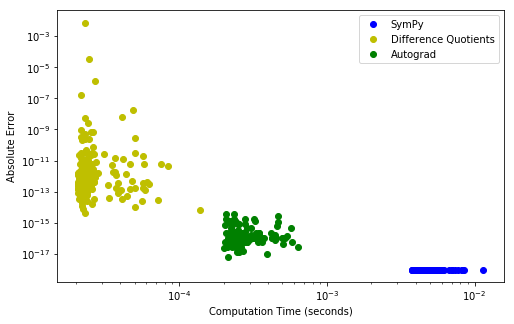

In [12]:
time_error(200)